!pip3 install keras==2.2.0

In [1]:
#https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
from keras import backend as K

Using TensorFlow backend.


In [2]:
K.image_data_format()

'channels_last'

In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'

(28, 28)


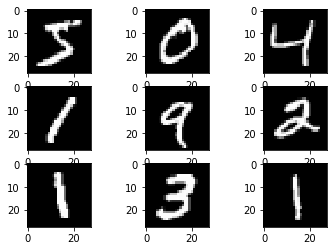

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_test[0].shape) # (28, 28)

# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()


    

#### Reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)

In [5]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [6]:
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(X_train)
X_train.shape

(60000, 28, 28, 1)

In [8]:
import os.path
 
if os.path.exists('images') == False:
    os.makedirs('images')

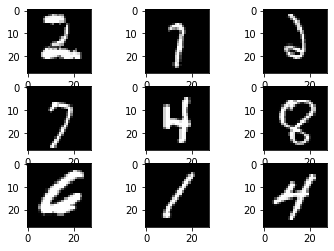

In [9]:
 for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

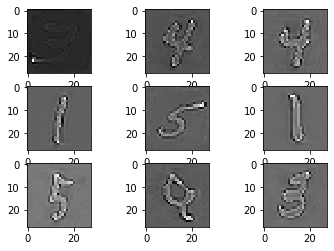

In [13]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=False,
                             zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

[6 3 6 6 5 7 4 0 5]


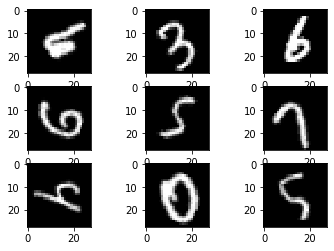

In [24]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    print(y_batch)
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        # show the plot
    pyplot.show()
    break
